<a href="https://colab.research.google.com/github/SMKProj/CarbonEmissionDataAnalysis/blob/main/CarbonEmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison of Linear Regression, Decision Trees and Support Vector Regressor in Predicting Carbon Emission**

In [10]:
!pip install dython

In [11]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('Fuel.csv')
print('Shape of data is: ', df.shape)
df.head(3)

Shape of data is:  (946, 15)


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200.0,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263.0,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232.0,5,6


In [7]:
df.drop(columns='Model Year', inplace=True)

In [8]:
col_names = ["Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2 Rating", "Smog Rating"]
df.columns = col_names

**Analysing quantitave value columns with response variable Emission**

In [61]:
newdf = df[['Engine', 'Cylinders', 'FC_City','FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg','Emission']]

**Plotting Data For Initial Inspection of Relation between Response and Independent variables. Numpy polyfit method was used to compute least squares polynomial for given set of data**

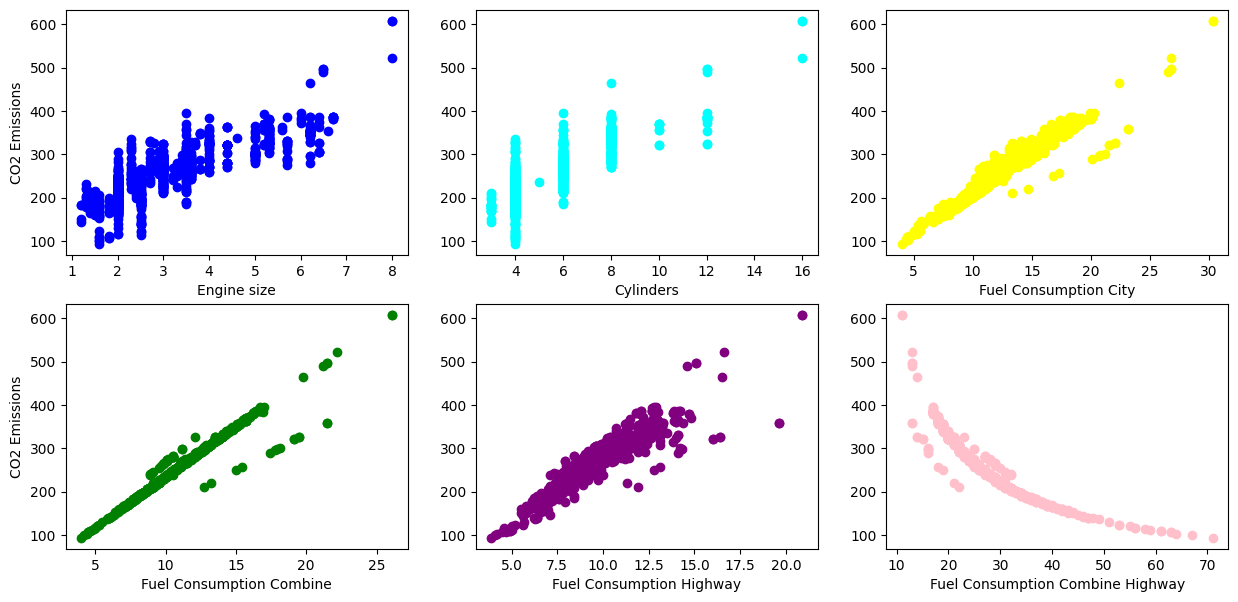

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.scatter(newdf.Engine, newdf.Emission,  color='blue')
fit=np.polyfit(newdf.Engine,newdf.Emission,1)
x=np.linspace(min(newdf.Engine),max(newdf.Engine),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")

plt.subplot(2,3,2)
plt.scatter(newdf.Cylinders, newdf.Emission,  color='cyan')
fit=np.polyfit(newdf.Cylinders,newdf.Emission,1)
x=np.linspace(min(newdf.Cylinders),max(newdf.Cylinders),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Cylinders")

plt.subplot(2,3,3)
plt.scatter(newdf.FC_City, newdf.Emission,  color='yellow')
fit=np.polyfit(newdf.FC_City,newdf.Emission,1)
x=np.linspace(min(newdf.FC_City),max(newdf.FC_City),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption City")


plt.subplot(2,3,4)
plt.scatter(newdf.FC_Comb_L, newdf.Emission,  color='green')
fit=np.polyfit(newdf.FC_Comb_L,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Comb_L),max(newdf.FC_Comb_L),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Combine")
plt.ylabel("CO2 Emissions")

plt.subplot(2,3,5)
plt.scatter(newdf.FC_Hwy, newdf.Emission,  color='purple')
fit=np.polyfit(newdf.FC_Hwy,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Hwy),max(newdf.FC_Hwy),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Highway")

plt.subplot(2,3,6)
plt.scatter(newdf.FC_Comb_Mpg, newdf.Emission,  color='pink')
fit=np.polyfit(newdf.FC_Comb_Mpg,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Comb_Mpg),max(newdf.FC_Comb_Mpg),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Combine Highway")
plt.savefig('VisualRepresentationofData.png')
plt.show()


In [51]:
newdf.head(3)

,Engine,Cylinders,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,CO2 Rating,Emission
0,2.4,4,9.9,7.0,8.6,33,6,200.0
1,3.5,6,12.6,9.4,11.2,25,4,263.0
2,2.0,4,11.0,8.6,9.9,29,5,232.0


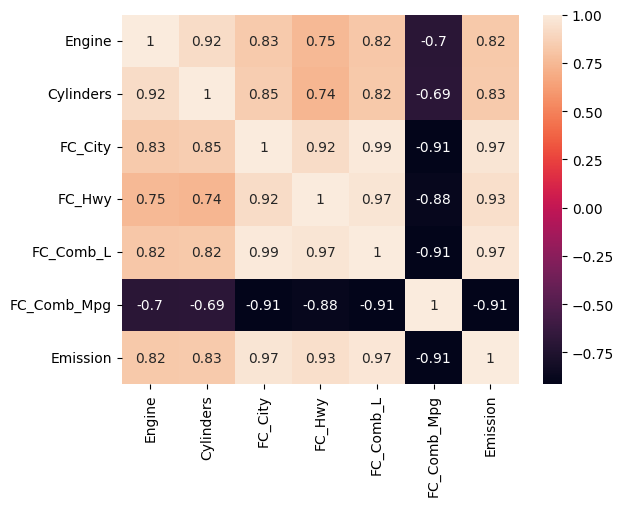

In [62]:
sns.heatmap(newdf.corr(), annot = True);

**Train and Test Split Function is Used to Create Training and Test Data**

In [52]:
X = newdf.drop(['Emission'], axis=1).values
Y = newdf['Emission'].values

In [53]:
import numpy as np

print('Null Values in X: ',np.isnan(X).sum())
print('Null values in Y: ',np.isnan(Y).sum())

Null Values in X:  0
Null values in Y:  1


In [54]:
Y[np.isnan(Y)] = np.nanmean(Y)
print('Null values in Y: ',np.isnan(Y).sum())

Null values in Y:  0


In [56]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size = 0.15, random_state = 0)

In [57]:
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (804, 7)
Y_train (804,)
X_test (142, 7)
Y_test (142,)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Training set score: {:.2f}".format(model.score(X_train, Y_train)))
print("Test set score: {:.7f}".format(model.score(X_test, Y_test)))


Training set score: 0.97
Test set score: 0.9740792


In [63]:
MSE = mean_squared_error(Y_test,y_pred)
RMSE = sqrt(MSE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print('R squared score: %.2f' % r2_score(Y_test,y_pred))

MSE:  97.6454717698822
RMSE:  9.881572332877102
R squared score: 0.97


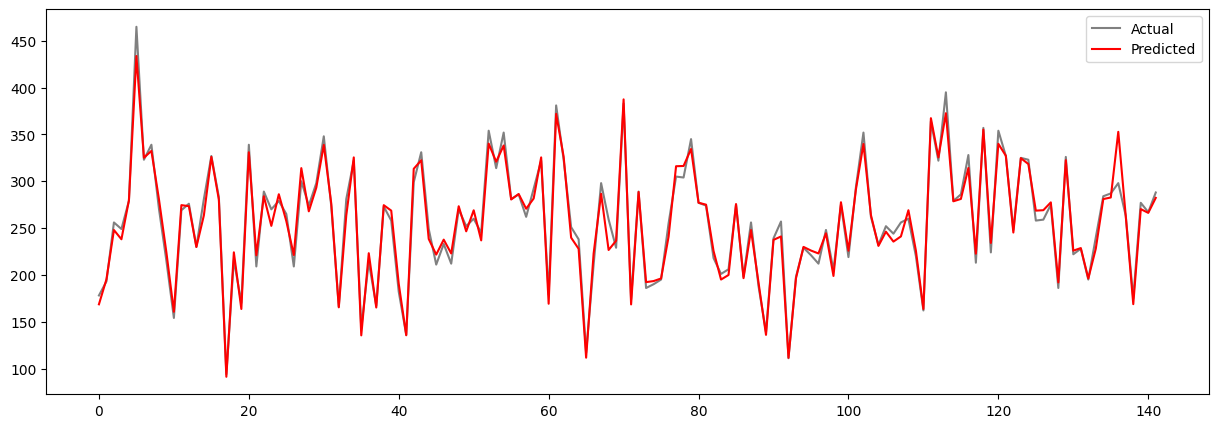

In [64]:
plt.figure(figsize=(15,5))
plt.plot(Y_test, color = 'gray', label='Actual')
plt.plot(y_pred, color = 'red', label = 'Predicted')
plt.legend()

<ipython-input-65-b5a3345f13b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test, label='Actual')
<ipython-input-65-b5a3345f13b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


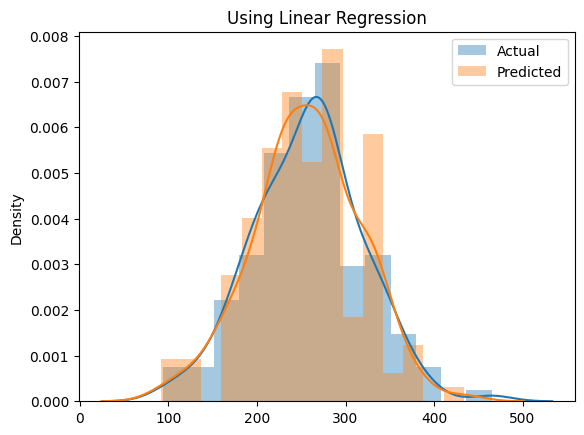

In [65]:
sns.distplot(Y_test, label='Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Using Linear Regression')
plt.savefig('LinearRegressionDataModeling.png')

In [72]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
pred_dt = dt.predict(X_test)

print("Training set score: {:.2f}".format(dt.score(X_train, Y_train)))
print("Test set score: {:.7f}".format(dt.score(X_test, Y_test)))

Training set score: 1.00
Test set score: 0.9922998


In [67]:
MSE = mean_squared_error(Y_test,pred_dt)
RMSE = sqrt(MSE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print('R squared score: %.2f' % r2_score(Y_test,pred_dt))

MSE:  29.19548403294546
RMSE:  5.4032845596864005
R squared score: 0.99


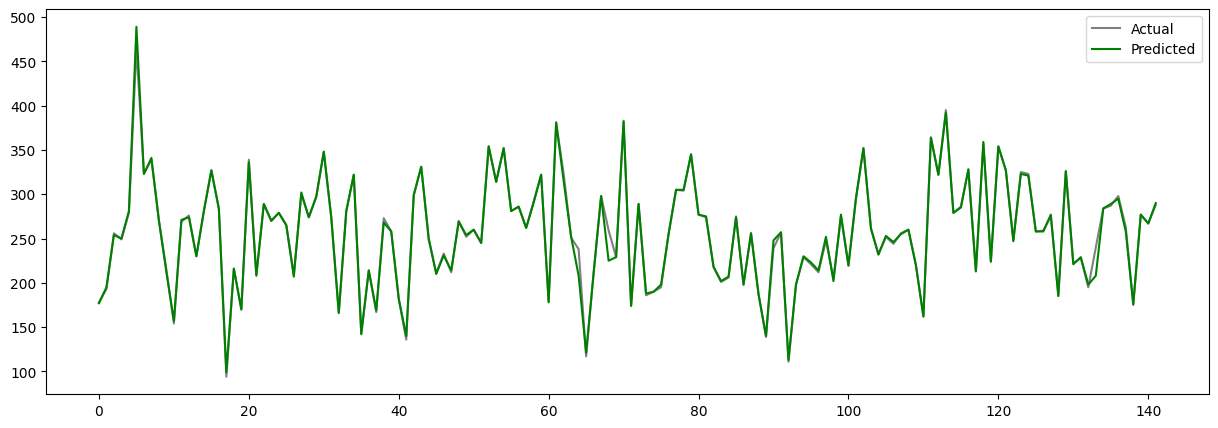

In [71]:
plt.figure(figsize=(15,5))
plt.plot(Y_test, color = 'gray', label='Actual')
plt.plot(pred_dt, color = 'green', label = 'Predicted')
plt.legend()

<ipython-input-73-c86d258c84e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test, label="Actual")
<ipython-input-73-c86d258c84e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_dt, label="Predicted")


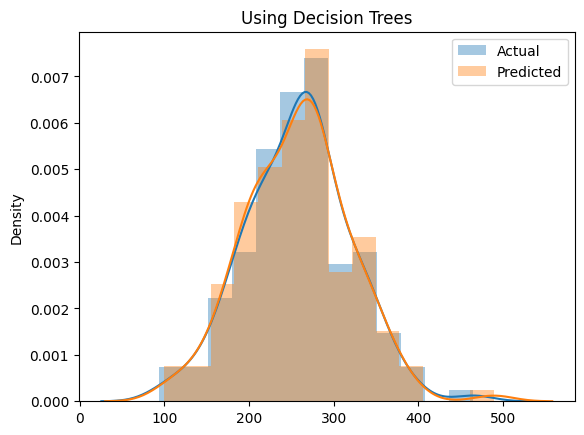

In [73]:
plt.figure()
sns.distplot(Y_test, label="Actual")
sns.distplot(pred_dt, label="Predicted")
plt.legend()
plt.title('Using Decision Trees')
plt.savefig('DecisionTreesDataModeling.png')
plt.show()

In [75]:
from sklearn.svm import SVR
from sklearn import metrics

sv = SVR(kernel = 'linear')
sv.fit(X_train, Y_train)

pred_sv = sv.predict(X_test)

print("Training set score: {:.2f}".format(dt.score(X_train, Y_train)))
print("Test set score: {:.7f}".format(dt.score(X_test, Y_test)))

MSE = mean_squared_error(Y_test,pred_sv)
RMSE = sqrt(MSE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print('R squared score: %.2f' % r2_score(Y_test,pred_sv))

Training set score: 1.00
Test set score: 0.9922998
MSE:  149.68774574785974
RMSE:  12.234694346319394
R squared score: 0.96


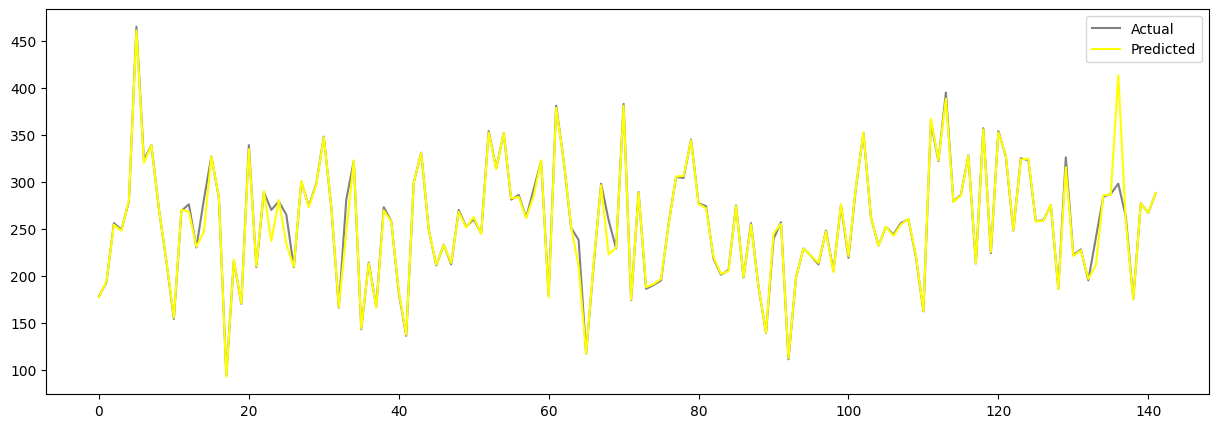

In [76]:
plt.figure(figsize=(15,5))
plt.plot(Y_test, color = 'gray', label='Actual')
plt.plot(pred_sv, color = 'yellow', label = 'Predicted')
plt.legend()

<ipython-input-165-11f2c08f95ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test, label="Actual")
<ipython-input-165-11f2c08f95ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_sv, label="Predicted")


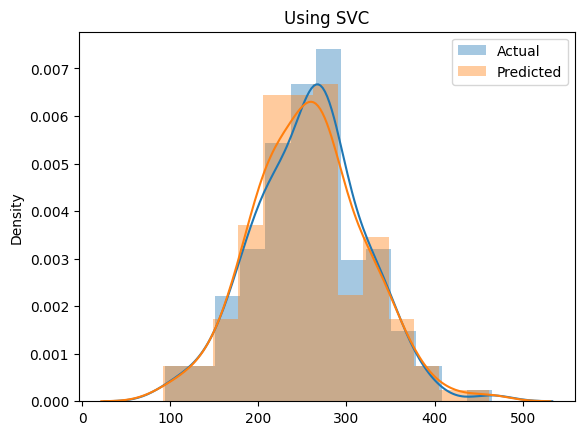

In [165]:
plt.figure()
sns.distplot(Y_test, label="Actual")
sns.distplot(pred_sv, label="Predicted")
plt.legend()
plt.title('Using SVC')
plt.savefig('SVMDataModeling.png')
plt.show()